In [129]:
import random
import torch

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import math

from torch import nn

In [130]:
sns.set(style='white', rc={'figure.figsize':(14,8)})
plt.rcParams.update({'font.size': 42})

MICRO_SIZE = 14
SMALL_SIZE = 20
MEDIUM_SIZE = 26
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MICRO_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [131]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

In [132]:
class Network(nn.Module):
    def __init__(self, n_hidden):
        super().__init__()
        
        self.hidden = nn.Linear(784, n_hidden)
        self.output = nn.Linear(n_hidden, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x) 
        return x

In [133]:
model = Network(32).to(device)

In [134]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [135]:
x_train = np.reshape(x_train, (len(x_train), 784))/255
x_test = np.reshape(x_test, (len(x_test), 784))/255

In [136]:
def test(model, device, x, y):
    
    data = x
    target = y
    
    target = torch.from_numpy(target).float().to(device)
    data = torch.from_numpy(data).float().to(device)
    
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(target.view_as(pred)).sum().item()
    accuracy = (correct/len(target))*100.
    
    return accuracy

In [137]:
def darwin(weight1, bias1, weight2, bias2, x, y):
    model = Network(32).to(device)
    
    with torch.no_grad():
        model.hidden.weight = nn.Parameter(torch.from_numpy(weight1).float())
        model.hidden.bias = nn.Parameter(torch.from_numpy(bias1).float())
        
        model.output.weight = nn.Parameter(torch.from_numpy(weight2).float())
        model.output.bias = nn.Parameter(torch.from_numpy(bias2).float())
    
    return test(model, device, x, y)

In [138]:
solutions = []
for s in range(100):
    solutions.append((np.random.randn(32, 784)*0.1,
                      np.random.randn(32)*0.1,
                      np.random.randn(10, 32)*0.1,
                      np.random.randn(10)*0.1
                     ))

In [139]:
def sort_tuple(tup): 
    tup.sort(key = lambda x: x[0]) 
    return tup

In [140]:
best_solutions = []
test_results = []
worst_solutions = []

for i in range(1000):
    ranked_solutions = []
    for s in solutions:
        ranked_solutions.append((darwin(s[0], s[1], s[2], s[3], x_train, y_train), s))
    ranked_solutions = sort_tuple(ranked_solutions)

    print(f"Generation: #{i} the best offspring")
    print(ranked_solutions[-1][0])
    print(f"Generation: #{i} the worst offspring")
    print(ranked_solutions[0][0])
    
    best_solutions.append(ranked_solutions[-1][0])
    worst_solutions.append(ranked_solutions[0][0])
    
    test_results.append(darwin(ranked_solutions[-1][1][0], 
                                     ranked_solutions[-1][1][1], 
                                     ranked_solutions[-1][1][2], 
                                     ranked_solutions[-1][1][3], 
                                     x_test, y_test)
                             )

    elements = []
    for s in ranked_solutions[-10:]:
        elements.append(s[1])

    new_generation = []

    for _ in range(100 + i*10):
        r = random.randrange(10)
        if r > 2:
            rand_el = random.choice(elements)
            e1 = rand_el[0] * random.uniform(0.98, 1.02)
            e2 = rand_el[1] * random.uniform(0.98, 1.02)
            e3 = rand_el[2] * random.uniform(0.98, 1.02)
            e4 = rand_el[3] * random.uniform(0.98, 1.02)

            new_generation.append((e1, e2, e3, e4))
        else:
            new_generation.append((np.random.randn(32, 784)*0.1,
                      np.random.randn(32)*0.1,
                      np.random.randn(10, 32)*0.1,
                      np.random.randn(10)*0.1
                     ))

    solutions = new_generation

Generation: #0 the best offspring
15.596666666666668
Generation: #0 the worst offspring
4.006666666666667
Generation: #1 the best offspring
15.61
Generation: #1 the worst offspring
5.618333333333333
Generation: #2 the best offspring
15.615000000000002
Generation: #2 the worst offspring
6.635000000000001
Generation: #3 the best offspring
15.811666666666666
Generation: #3 the worst offspring
4.8950000000000005
Generation: #4 the best offspring
15.821666666666667
Generation: #4 the worst offspring
4.823333333333333
Generation: #5 the best offspring
23.813333333333333
Generation: #5 the worst offspring
4.256666666666667
Generation: #6 the best offspring
23.81833333333333
Generation: #6 the worst offspring
3.6766666666666667
Generation: #7 the best offspring
23.823333333333334
Generation: #7 the worst offspring
4.461666666666667
Generation: #8 the best offspring
23.836666666666666
Generation: #8 the worst offspring
3.6999999999999997
Generation: #9 the best offspring
23.85666666666667
Gener

KeyboardInterrupt: 

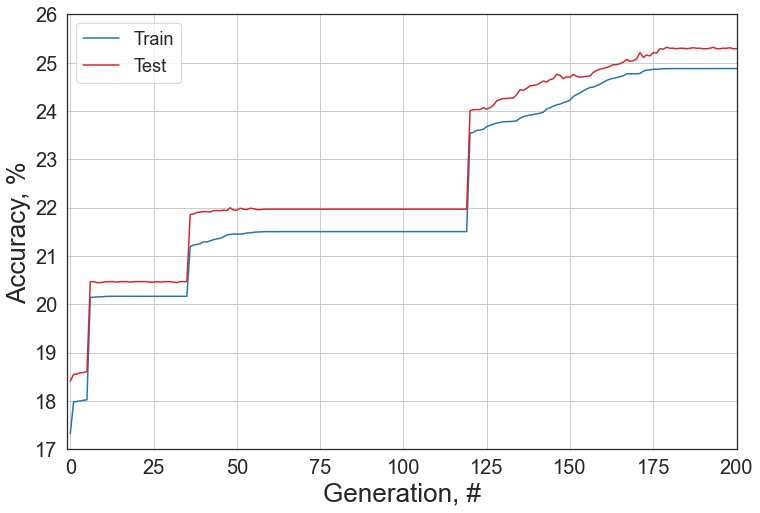

In [126]:
plt.figure(figsize=(12,8))
plt.plot(best_solutions, color='tab:blue')
plt.plot(test_results, color='tab:red')
plt.xlabel('Generation, #')
plt.ylabel('Accuracy, %')
plt.legend(['Train', 'Test'], fontsize=18)
plt.ylim((17,26))
plt.xlim((-1,200))
plt.grid('on')
plt.savefig('./training.pdf')

0.31622776601683794